# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12,33,Urban


In [4]:
#  1. Get the total rides for each city type
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# Create the suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
# Create the rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [5]:
#  2. Get the total drivers for each city type
urban_driver_count = city_data_df.groupby(["city"]).sum()["driver_count"]
suburban_driver_count = city_data_df.groupby(["city"]).sum()["driver_count"]
rural_driver_count = city_data_df.groupby(["city"]).sum()["driver_count"]
urban_driver_count

city
Amandaburgh         12
Barajasview         26
Barronchester       11
Bethanyland         22
Bradshawfurt         7
                    ..
West Robert         39
West Samuelburgh    73
Williamsonville      2
Williamsstad        59
Williamsview        46
Name: driver_count, Length: 120, dtype: int64

In [6]:
# 3. Get the total amount of fares for each city type
urban_fare_amt = urban_cities_df.groupby(["city"]).sum()["fare"]
suburban_fare_amt = suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_fare_amt = rural_cities_df.groupby(["city"]).sum()["fare"]
urban_fare_amt

city
Amandaburgh            443.55
Barajasview            557.31
Carriemouth            764.49
Christopherfurt        661.55
Deanville              491.01
                        ...  
West Patrickchester    451.73
West Robert            778.84
West Samuelburgh       544.19
Williamsstad           560.33
Williamsview           531.98
Name: fare, Length: 66, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fare_per_driver = urban_cities_df.groupby(["city"]).sum()["fare"]/urban_cities_df.groupby(["city"]).sum()["driver_count"]
suburban_avg_fare_per_driver = suburban_cities_df.groupby(["city"]).sum()["fare"]/suburban_cities_df.groupby(["city"]).sum()["driver_count"]

rural_avg_fare_per_driver = rural_cities_df.groupby(["city"]).sum()["fare"]/rural_cities_df.groupby(["city"]).sum()["driver_count"]
rural_avg_fare_per_driver.head()

city
Bradshawfurt       5.723429
Garzaport          3.446190
Harringtonfort     8.367500
Jessicaport       36.013333
Lake Jamie         8.589583
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame.
#Urban_Summary_df=pyber_data_df([type,urban_ride_count,urban_driver_count,urban_fare_amt,urban_avg_fare,urban_avg_fare_per_driver])

type_total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
type_total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
type_avg_fare_ride = type_total_fares/type_total_rides
type_avg_fare_driver = type_total_fares/type_total_drivers

                                 
                                 
                                 


In [10]:
pyber_summary_df = pd.DataFrame({
                          "Total Rides":type_total_rides,
                          "Total Drivers":type_total_drivers,
                          "Total Fares":type_total_fares,
                          "Avg Fare per Ride":type_avg_fare_ride,
                          "Avg Fare per Driver":type_avg_fare_driver})
    
#Summary_df=urban_ride_count
#type_total_rides
#type_total_drivers
#type_avg_fare_driver
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
pyber_summary_df.dtypes

Total Rides              int64
Total Drivers            int64
Total Fares            float64
Avg Fare per Ride      float64
Avg Fare per Driver    float64
dtype: object

In [13]:
#  8. Format the columns.
# Formatting
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)

pyber_summary_df["Avg Fare per Ride"] = pyber_summary_df["Avg Fare per Ride"].map('${:,.2f}'.format)

pyber_summary_df["Avg Fare per Driver"] = pyber_summary_df["Avg Fare per Driver"].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
city_type_date_fares_df = pyber_data_df.groupby(["city","type","date"]).sum()["fare"]
city_type_date_fares_df

city          type   date           
Amandaburgh   Urban  1/11/2019 2:22     29.24
                     1/13/2019 16:04    23.35
                     1/2/2019 9:57      33.06
                     1/21/2019 4:12      9.26
                     1/29/2019 23:28    41.06
                                        ...  
Williamsview  Urban  4/18/2019 2:07     39.79
                     4/26/2019 0:30     20.89
                     4/7/2019 0:32      18.92
                     4/7/2019 2:32      19.19
                     5/4/2019 14:56     32.80
Name: fare, Length: 2375, dtype: float64

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
city_type_date_fares_df = city_type_date_fares_df.reset_index()
city_type_date_fares_df

,city,type,date,fare
0,Amandaburgh,Urban,1/11/2019 2:22,29.24
1,Amandaburgh,Urban,1/13/2019 16:04,23.35
2,Amandaburgh,Urban,1/2/2019 9:57,33.06
3,Amandaburgh,Urban,1/21/2019 4:12,9.26
4,Amandaburgh,Urban,1/29/2019 23:28,41.06
...,...,...,...,...
2370,Williamsview,Urban,4/18/2019 2:07,39.79
2371,Williamsview,Urban,4/26/2019 0:30,20.89
2372,Williamsview,Urban,4/7/2019 0:32,18.92
2373,Williamsview,Urban,4/7/2019 2:32,19.19


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pd.pivot_table(city_type_date_fares_df,index=["date"],values=["fare"],columns=["type"],aggfunc=[sum])


sum                
                fare                
type           Rural Suburban  Urban
date                                
1/1/2019 0:08    NaN      NaN  37.91
1/1/2019 0:46    NaN    47.74    NaN
1/1/2019 12:32   NaN    25.56    NaN
1/1/2019 14:40   NaN      NaN   5.42
1/1/2019 14:42   NaN      NaN  12.31
...              ...      ...    ...
5/8/2019 1:54    NaN      NaN  32.69
5/8/2019 2:31    NaN      NaN  41.33
5/8/2019 4:20    NaN      NaN  21.99
5/8/2019 4:39    NaN      NaN  18.45
5/8/2019 7:29    NaN      NaN  18.55

[2361 rows x 3 columns]

In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Date_fare_df=pd.pivot_table(city_type_date_fares_df,index=["date"],values=["fare"],columns=["type"])
Jan_April_df = Date_fare_df.loc['1/1/2019':'4/29/2019','fare']



In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
Jan_April_df.index = pd.to_datetime(Jan_April_df.index)
Jan_April_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [20]:
# 7. Check that the datatype for the index is datetime using 
Jan_April_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [32]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Week_fare_df = Jan_April_df.resample("W").sum()
Week_fare_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


In [51]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



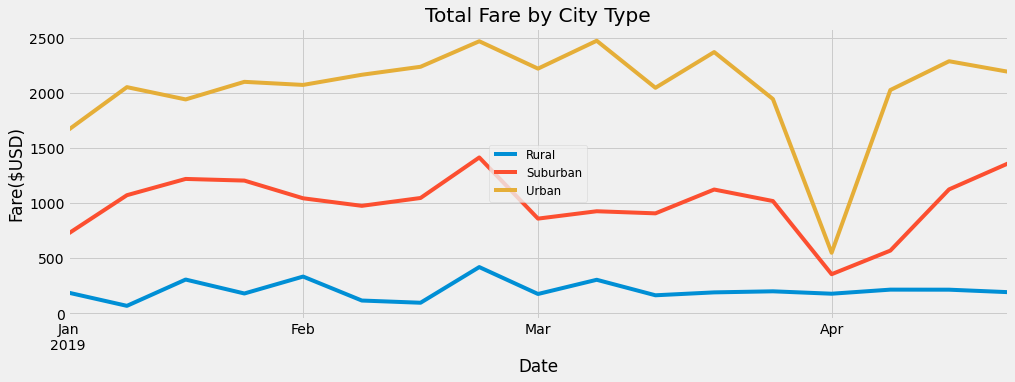

In [52]:
#Plot using object oriented method
# Create the plot with ax.plt()

#fig, ax=plt.subplots()
#ax = plt.gca()

#Week_fare_df.plot(x=index,y="fare")

ax = Week_fare_df.plot(figsize=(15,5))

ax.set_title("Total Fare by City Type")
ax.set_ylabel('Fare($USD)')
ax.set_xlabel('Date')
ax.legend(loc='center',fontsize='small')

#Section 5.3.1 says to save figure as an image use this for object oriented
#fig = plt.figure("analysis/Fig11.png")
plt.savefig("analysis/Fig11.png")
#only use plt.show once in a session or graph may show incorrectly.  restart and clear output to rerun
plt.show()